In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn

In [103]:
city_path = os.path.join("city_data.csv")
ride_path = os.path.join("ride_data.csv")
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

combined_data = pd.merge(city_data, ride_data, on="city")
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [70]:
#Avg fair per city
average_fare = combined_data.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})

In [71]:
#Total rides per city
total_rides = combined_data.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})

In [72]:
#Total drivers per city
total_drivers = combined_data[["city", "driver_count"]].drop_duplicates("city")

In [73]:
#City Type
city_type = combined_data[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")

In [74]:
urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']

In [75]:
ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='lightcoral', s=final_df['driver_count']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1) 
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='lightskyblue',s=final_df['driver_count']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=final_df['driver_count']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)

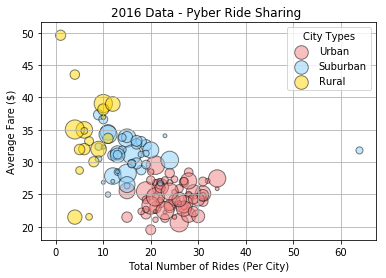

In [76]:
plt.title("2016 Data - Pyber Ride Sharing ")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid(True)
plt.show()

In [77]:
# Pct of Total Fairs by city type
total_fares = combined_data["fare"].sum()
urban_fare = combined_data.loc[combined_data["type"] == "Urban", "fare"].sum()
rural_fare = combined_data.loc[combined_data["type"] == "Rural", "fare"].sum()
suburban_fare = combined_data.loc[combined_data["type"] == "Suburban", "fare"].sum()
urban_fare_p = round(urban_fare/total_fares, 2) *100
rural_fare_p = round(rural_fare/total_fares, 2) *100
suburban_fare_p = round(suburban_fare/total_fares, 2) *100

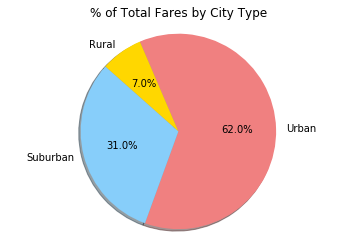

In [78]:
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  
plt.title("% of Total Fares by City Type")
plt.show()

In [79]:
#Pct of total rides by city type
final_total_rides = len(combined_data)
urban_rides = round(combined_data.loc[combined_data["type"] == "Urban", "ride_id"].count()/final_total_rides, 2) * 100
rural_rides = round(combined_data.loc[combined_data["type"] == "Rural", "ride_id"].count()/final_total_rides, 2) * 100
suburban_rides = round(combined_data.loc[combined_data["type"] == "Suburban", "ride_id"].count()/final_total_rides, 2) * 100

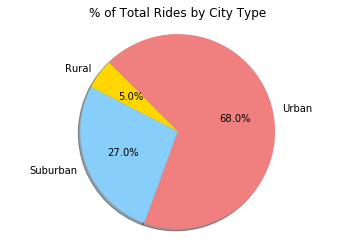

In [80]:
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides, rural_rides, suburban_rides]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')
plt.title("% of Total Rides by City Type")
plt.show()

In [84]:
#Pct of total drivers by city type
final_total_drivers = final_df["driver_count"].sum()
urban_drivers = round(final_df.loc[final_df["type"] == "Urban", "driver_count"].sum()/final_total_drivers, 2)* 100
rural_drivers = round(final_df.loc[final_df["type"] == "Rural", "driver_count"].sum()/final_total_drivers, 2)* 100
suburban_drivers = round(final_df.loc[final_df["type"] == "Suburban", "driver_count"].sum()/final_total_drivers, 2)* 100

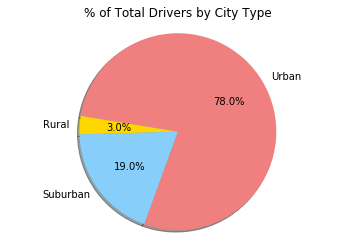

In [89]:
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal') 
plt.title("% of Total Drivers by City Type")
plt.show()